# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#reg">Linear Regression Models</a></li>
<li><a href="#rec">Movie Recommendation System</a></li>
<li><a href="#word">WordCloud Generation</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I am a movie enthusiast which is why I have chosen this TMDB Data for Analysis purpose which contains information about 10,000 movies collected from the The Movie DataBase (TMDB). Now I will be analyzing this dataset to learn more and more about different movies, about their budgets, revenues, directors and many other things.

> ## Questions for Analysis
     - What were the Top 5 Genres throughout the years?
     - How did the amount of movies produced changed over time?
     - What is the Average Running Time Of All the Movies?
     - How does the budget change throughout the years?
     - What should be an appropriate budget for a movie to succeed?
>


In [1]:
# Loading all necessary libraries to use in this investigation of dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Loading the data from a csv file to a Pandas dataframe
df = pd.read_csv('tmdb-movies.csv')

# Using .shape function to find out the number of rows and columns of the dataset
print(df.shape)

(10866, 21)


In [5]:
# Displaying a part of the dataset to see the different column names and to brainstorm some questions.
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# Using .info() function to find out null values in the dataset and to learn more about the datatypes used in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Using .isnull() to find the number of null values in each column and summing them up using .sum() function
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Getting a more detailed view of the dataset using Statistical function describe()
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Inspected the datatypes in the dataset
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

So far the data looks fine and all the datatypes are correct, so no need to typecast the data using astype() function

 
## Data Cleaning (Removing all NaN values !)

#### The NaN values exists in  'imdb_id' , 'cast', 'homepage' , 'director', 'tagline', 'keywords', 'overview' , 'genres', 'production_companies'


In [9]:
# Checking if all null values have been dropped or not 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# Checking the dimensions of the TMDB dataset before removing NaN values
df.shape              

(10866, 21)

In [11]:
# Use .duplicated() function to check if any duplicate row exist and then summing the total duplicated rows using .sum()
df.duplicated().sum()

1

In [12]:
# Removing duplicated rows from the dataset
df.drop_duplicates(inplace = True)

In [13]:
# Printing them again to check if any duplicated rows still exist or not - should be 0
df.duplicated().sum()

0

In [14]:
# Removing null values from all columns [ inplace = True, means making changes in the original df] 
df.dropna(inplace = True)

In [15]:
# Checking if all null values have been dropped or not 
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [16]:
# Checking the new dimensions of the TMDB dataset after cleaning the data and removing NaN values.
df.shape

(1992, 21)

#### Now, we will remove unnecessary columns from the dataframe, so that it will be easier for us to work on it.

In [17]:
# Removing multiple columns using drop function.
df.drop( ['homepage', 'overview', 'imdb_id', 'tagline' ], axis=1, inplace = True)

In [18]:
# Confirming that the desired columns are removed or not
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [8]:
# Different genres are separated using '|' 
df['genres'].head(3)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
Name: genres, dtype: object

In [13]:
# Splitting different genres using split() function
df_genres = df['genres'].str.split('|').tolist()

In [16]:
# Checking to see if the genres have been splitted or not
df_genres[0:3]

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller']]

<a id='eda'></a>
## Exploratory Data Analysis

>  Now after trimming and cleaned the data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. Looking at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What were the Top 5 Genres throughout the years?)

In [18]:
#Creating a copy of the datafram
genres = df.copy()

In [19]:
# Dropping unnecessary columns from our dataframe to simplify our Exploration 
genres.drop(['budget', 'revenue','keywords', 'original_title', 'cast', 'director',
             'runtime', 'release_date', 'production_companies', 'vote_count', 'vote_average','budget_adj', 'revenue_adj'],
            axis=1, inplace=True)

In [20]:
genres.head()

,id,imdb_id,popularity,homepage,tagline,overview,genres,release_year
0,135397,tt0369610,32.985763,http://www.jurassicworld.com/,The park is open.,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,2015
1,76341,tt1392190,28.419936,http://www.madmaxmovie.com/,What a Lovely Day.,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,2015
2,262500,tt2908446,13.112507,http://www.thedivergentseries.movie/#insurgent,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,2015
3,140607,tt2488496,11.173104,http://www.starwars.com/films/star-wars-episod...,Every generation has a story.,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy,2015
4,168259,tt2820852,9.335014,http://www.furious7.com/,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller,2015


In [21]:
# Splitting genres into genre wrt id

genre = genres[['id', 'genres']]
genre.head()

,id,genres
0,135397,Action|Adventure|Science Fiction|Thriller
1,76341,Action|Adventure|Science Fiction|Thriller
2,262500,Adventure|Science Fiction|Thriller
3,140607,Action|Adventure|Science Fiction|Fantasy
4,168259,Action|Crime|Thriller


In [22]:
# Initializing an empty list
list1 = []

# Splitting the genres with '|' into different genre and appending to a list
list1 = genre['genres'].str.split('|').tolist()

In [23]:
# Displaying the Genres separately now
list1[0:3]

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller']]

In [28]:
# Converting the list into a dataframe with respect to id using stack() function

stacked_genre = pd.DataFrame(list1, index = genre['id']).stack()
stacked_genre

id       
135397  0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
76341   0             Action
                  ...       
8469    0             Comedy
13963   0        Documentary
        1              Music
16214   0             Action
        1             Comedy
Length: 5123, dtype: object

In [29]:
# Removing id as the index
stacked_genre = stacked_genre.reset_index()
stacked_genre.head()

,id,level_1,0
0,135397,0,Action
1,135397,1,Adventure
2,135397,2,Science Fiction
3,135397,3,Thriller
4,76341,0,Action


In [30]:
# Removing level_1 column
stacked_genre = stacked_genre.drop(columns='level_1')
stacked_genre

,id,0
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action
...,...,...
5118,8469,Comedy
5119,13963,Documentary
5120,13963,Music
5121,16214,Action


In [31]:
# Renaming columns
stacked_genre = stacked_genre.rename(columns={0: 'genre'})
stacked_genre.head()

,id,genre
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


In [32]:
# Merging the two dataframes genres and stacked_genre
merged_df = pd.merge(genres, stacked_genre, on='id', how='left')

In [33]:
# Removing unnecessary columns from the Dataframe
merged_df.drop(['genres', 'id'], axis=1, inplace=True)

In [34]:
merged_df.head()

,popularity,release_year,genre
0,32.985763,2015,Action
1,32.985763,2015,Adventure
2,32.985763,2015,Science Fiction
3,32.985763,2015,Thriller
4,28.419936,2015,Action


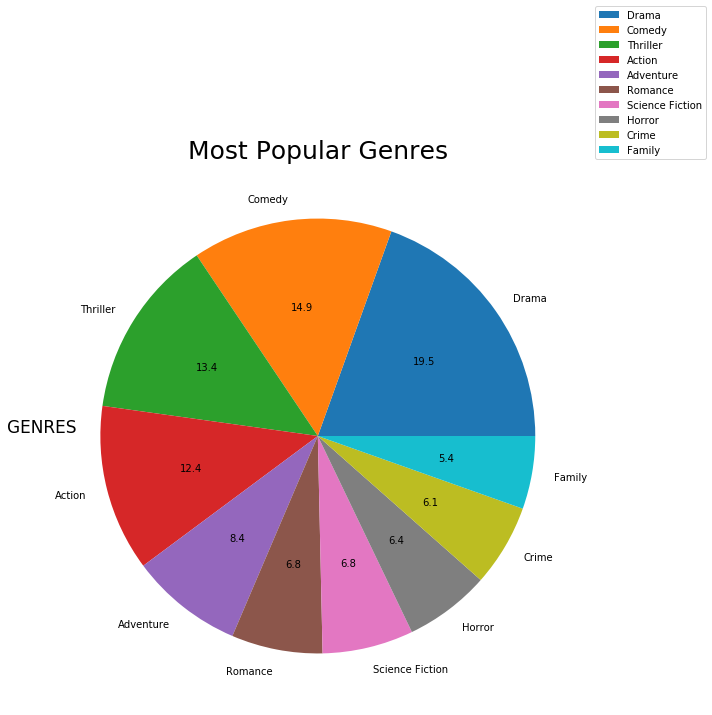

In [35]:
# Using plot() function to plot a pie-chart
merged_df['genre'].value_counts()[:10].plot(kind = 'pie', figsize=(13,10), autopct='%.1f'); # autopct shows percentage in piechart 
plt.ylabel('GENRES', fontsize=17, rotation=0)
plt.title('Most Popular Genres', fontsize = 25);

# Defining the key of pie-chart
plt.legend(bbox_to_anchor=(1, 1, 4, 2) ,loc=3);

### From the pie-chart above, we can clearly see that 'Drama' , 'Comedy', 'Thriller', 'Action', and 'Adventure' are the Top 5  Genres throughout the years.


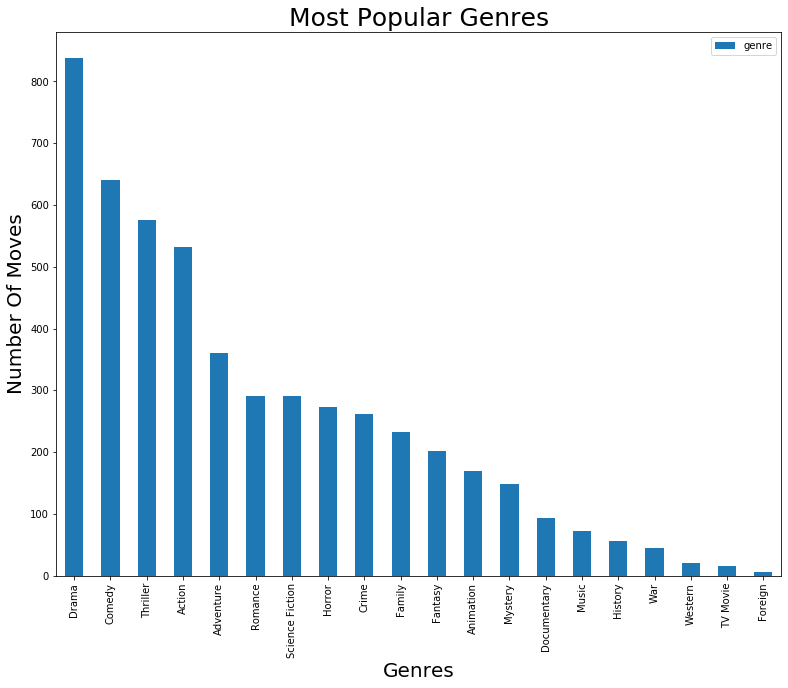

In [36]:
# Using plot function to plot a barchart
merged_df['genre'].value_counts().plot(kind = 'bar', figsize=(13,10));
plt.title('Most Popular Genres', fontsize = 25);
plt.ylabel("Number Of Moves", fontsize = 20 );
plt.xlabel("Genres", fontsize = 20);
plt.legend();

#### The above graph shows different genres ranging from the most watched to the least watched and also shows the frequency of each. It is quite evident from the graph that Drama is the most popular genre among all of the genres

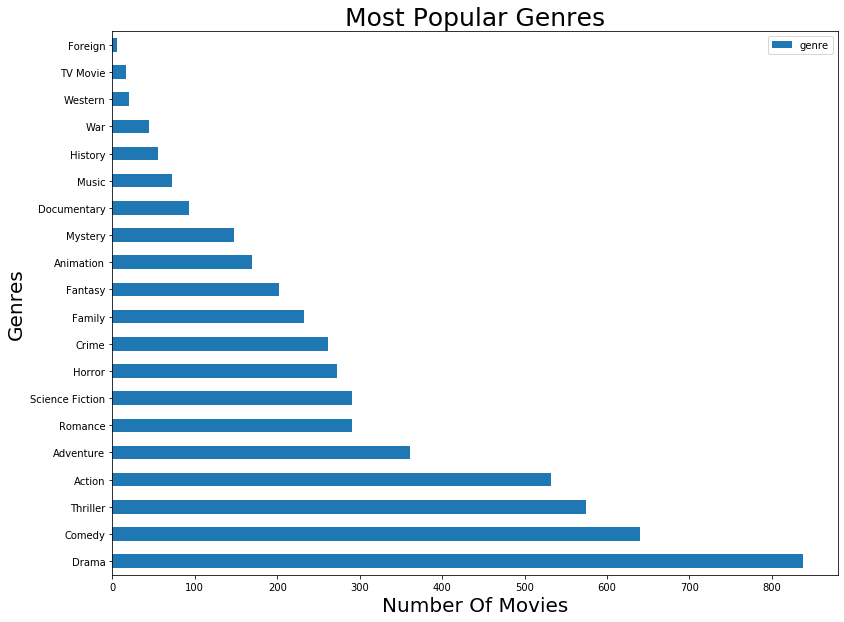

In [37]:
# Plotting a Horizontal Bar Chart using plot function
merged_df['genre'].value_counts().plot(kind = 'barh', figsize=(13,10));
plt.title('Most Popular Genres', fontsize = 25);
plt.ylabel("Genres", fontsize = 20 );
plt.xlabel("Number Of Movies", fontsize = 20);
plt.legend();

#### This graph makes it much easier to visualize different Genres and the Frequencies of each Genre

In [38]:
# We can also confirm that the Top Genre is 'Drama' using describe() function 

merged_df['genre'].describe()

count      5123
unique       20
top       Drama
freq        838
Name: genre, dtype: object

**Hence confirmed the top genre for movies is 'Drama' with a frequency of *838* times**



### Research Question 2 (How did the amount of movies produced changed over time?)

In [39]:
# To create an array of release_year
years = df['release_year'].unique()    

# Sorting them orderwise
years.sort()

display(years)

array([1961, 1962, 1963, 1964, 1965, 1967, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [40]:
# Creating a list of total number of movies released each year
amount_of_movies = []

for year in years:
    filtered_df = merged_df[merged_df['release_year'] == year]            # Filtering out data and storing it wrt to years
    no_of_rows = len(filtered_df.index)                                   # to find number of rows
    amount_of_movies.append((year,no_of_rows))                            # Appending years,rows

In [41]:
# Returns a list of movies
amount_of_movies        

[(1961, 2),
 (1962, 3),
 (1963, 3),
 (1964, 5),
 (1965, 3),
 (1967, 3),
 (1969, 3),
 (1970, 3),
 (1971, 12),
 (1972, 2),
 (1973, 6),
 (1974, 5),
 (1975, 10),
 (1976, 4),
 (1977, 8),
 (1978, 7),
 (1979, 14),
 (1980, 4),
 (1981, 16),
 (1982, 11),
 (1983, 20),
 (1984, 17),
 (1985, 13),
 (1986, 6),
 (1987, 21),
 (1988, 13),
 (1989, 16),
 (1990, 22),
 (1991, 8),
 (1992, 18),
 (1993, 26),
 (1994, 19),
 (1995, 31),
 (1996, 49),
 (1997, 26),
 (1998, 30),
 (1999, 59),
 (2000, 55),
 (2001, 53),
 (2002, 89),
 (2003, 99),
 (2004, 133),
 (2005, 193),
 (2006, 247),
 (2007, 361),
 (2008, 360),
 (2009, 488),
 (2010, 519),
 (2011, 534),
 (2012, 375),
 (2013, 326),
 (2014, 358),
 (2015, 415)]

In [42]:
# Reference: 
# [https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/] 
# [https://kite.com/python/answers/how-to-convert-a-list-of-lists-into-a-pandas-dataframe-in-python]

# Converting list into a dataframe 
column_names = ['Year', 'Number Of Movies']
df_amount_of_movies = pd.DataFrame(amount_of_movies, columns = column_names)
df_amount_of_movies

,Year,Number Of Movies
0,1961,2
1,1962,3
2,1963,3
3,1964,5
4,1965,3
5,1967,3
6,1969,3
7,1970,3
8,1971,12
9,1972,2


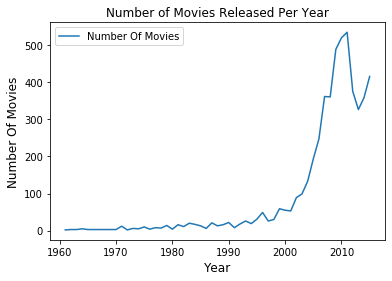

In [43]:
df_amount_of_movies.plot(x = 'Year', y = 'Number Of Movies', kind = 'line');
plt.title('Number of Movies Released Per Year');
plt.xlabel('Year', fontsize=12);
plt.ylabel('Number Of Movies', fontsize=12);

#### From the graph above, we can see that the Number Of Movies has increased tremendously throughout the years. 
#### In the year 2011, a peak was attained of 534 Movies, which is quite evident from the mountainous curve in the graph.

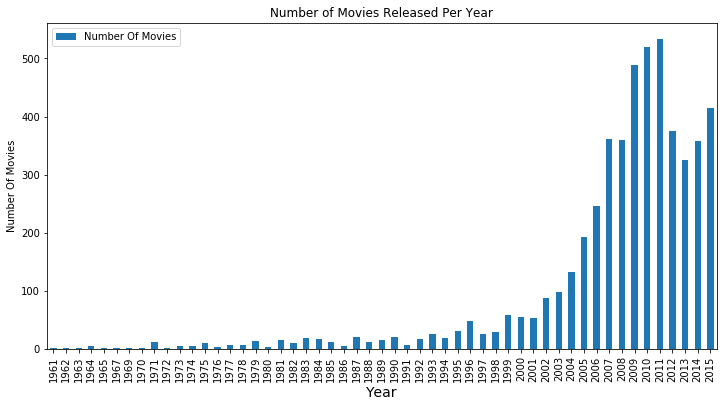

In [44]:
df_amount_of_movies.plot(x = 'Year', y = 'Number Of Movies', kind = 'bar', figsize=(12,6));
plt.title('Number of Movies Released Per Year');
plt.xlabel('Year', fontsize = 14);
plt.ylabel('Number Of Movies');

#### This graph gives a much more clearer picture and shows that 2011 is the year with the most number of movies released.



### Research Question 3 (What is the Average Running Time Of All the Movies?)

In [45]:
avg_runtime = df['runtime'].mean()
avg_runtime

106.04016064257029

The Average Runtime Of All Movies In This Dataset is **106 minutes (1 hour and 46 minutes)** approximately. Let us confirm this by plotting a histogram and take a deeper look at the results.

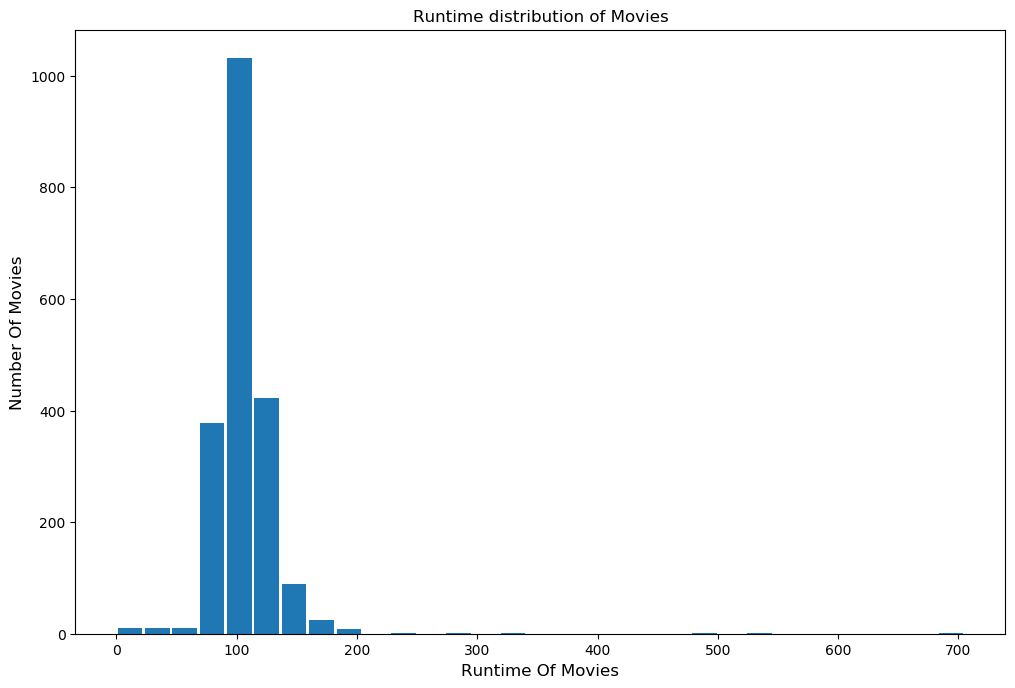

In [46]:
# Setting the figure size
plt.figure(figsize=(12,8), dpi=100)

plt.xlabel('Runtime Of Movies' , fontsize = 12)
plt.ylabel('Number Of Movies', fontsize = 12)
plt.title('Runtime distribution of Movies')

plt.hist(df['runtime'], rwidth = 0.9, bins = 31)

# To display the histogram
plt.show()

#### From the graph above we can clearly see that the Average Running Time of all movies is approximately close to 100 minutes. 





### Research Question 4 (How does the budget changes throughout the years?)

In [47]:
# Combining released year and budget in a new dataframe using groupby() function
combined_year_budget = df.groupby('release_year')['budget'].sum()
combined_year_budget.head()

release_year
1961     3000000
1962     1100000
1963     2500000
1964     4000000
1965    11000000
Name: budget, dtype: int64

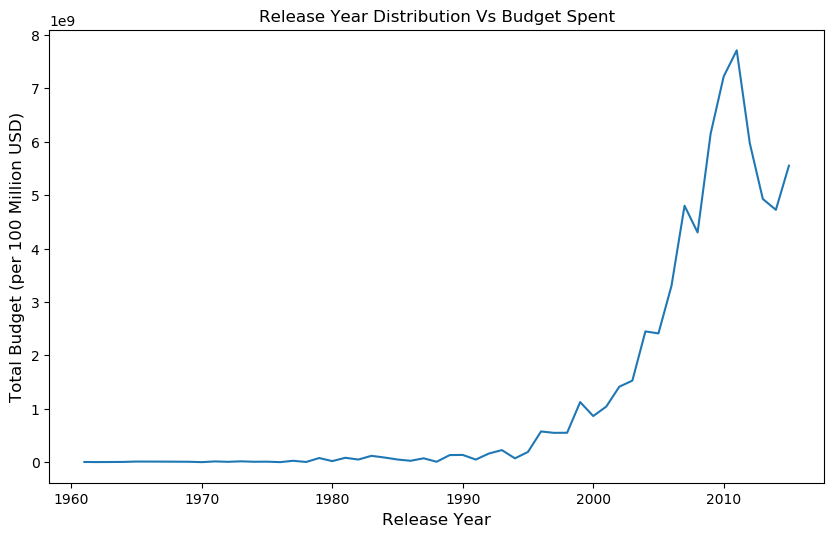

In [48]:
# Setting the figure size
plt.figure(figsize=(10,6), dpi=100)                           # dpi specifies the size of graph

plt.xlabel('Release Year' , fontsize = 12)
plt.ylabel('Total Budget (per 100 Million USD)', fontsize = 12)
plt.title('Release Year Distribution Vs Budget Spent')

# Plotting the dataframe
plt.plot(combined_year_budget)

# To display the histogram
plt.show()

#### This graph clearly shows that throughout the years the total budget of the movies has been increasing rapidly and in 2011 it reached to it's maximum potential.

In [49]:
# Shows the maximum total budget of all movies
combined_year_budget.max()

7711134894

In [50]:
# Confirming using pandas function

# Shows in which year Maximum budget was used
combined_year_budget.idxmax()

2011

In [51]:
# Checking in which year minimum budget was used.
combined_year_budget.idxmin()

1970

In [52]:
# Retrieving details for the lowest budget movie in 1970
min_budget = df.query('release_year == 1970')      
min_budget

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10657,5722,0.374514,0,0,Beyond the Valley of the Dolls,Dolly Read|Cynthia Myers|Marcia McBroom|John L...,Russ Meyer,pop|pop star|musical,109,Comedy|Drama|Thriller,Twentieth Century Fox Film Corporation,7/17/70,19,6.2,1970,0.0,0.0


In [53]:
# Retrieving details for the maximum budget movies in 2011
max_budget = df.query('release_year == 2011')
max_budget

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3372,1771,7.959228,140000000,370569774,Captain America: The First Avenger,Chris Evans|Hugo Weaving|Tommy Lee Jones|Hayle...,Joe Johnston,new york|usa|world war ii|nazis|marvel comic,124,Action|Adventure|Science Fiction,Marvel Studios,7/22/11,5025,6.5,2011,1.357157e+08,3.592296e+08
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09
3375,1865,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,sea|captain|mutiny|sword|prime minister,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08
3376,61791,4.504530,93000000,482860185,Rise of the Planet of the Apes,Andy Serkis|Karin Konoval|Freida Pinto|James F...,Rupert Wyatt,intelligence|zoo|cage|dystopia|golden gate bridge,105,Thriller|Action|Drama|Science Fiction,20th Century Fox,8/3/11,2578,6.9,2011,9.015402e+07,4.680837e+08
3377,10195,4.123520,150000000,444115007,Thor,Chris Hemsworth|Natalie Portman|Tom Hiddleston...,Kenneth Branagh,new mexico|banishment|shield|marvel comic|hammer,115,Adventure|Fantasy|Action,Marvel Studios|Marvel Entertainment,4/21/11,4485,6.5,2011,1.454097e+08,4.305242e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,53101,0.084534,0,0,Manborg,Adam Brooks|Adam Camara|Jeremy Gillespie|Steph...,Steven Kostanski,cyborg|dystopic future,75,Horror|Science Fiction,Astron-6 Video International,9/22/11,11,4.7,2011,0.000000e+00,0.000000e+00
3865,70386,0.082769,0,0,The Devil's Rock,Craig Hall|Matthew Sunderland|Gina Varela|Karl...,Paul Campion,german|nazis|new zealand|black magic|occult,83,Fantasy|Horror|Thriller|War,New Zealand Film Commission|Severe Features|Ch...,7/8/11,11,4.8,2011,0.000000e+00,0.000000e+00
3878,58492,0.277237,0,621951,The Greatest Movie Ever Sold,Peter Berg|Paul Brennan|Ralph Nader|Brett Ratn...,Morgan Spurlock,comedian|comedy|duringcreditsstinger,90,Comedy|Documentary,Snoot Entertainment,4/22/11,50,6.4,2011,0.000000e+00,6.029181e+05
3886,202241,0.044221,20000000,0,Mildred Pierce,Kate Winslet|Evan Rachel Wood|Guy Pearce|Mare ...,Todd Haynes,infidelity|business woman|from rags to riches,336,Drama,Home Box Office (HBO)|Metro-Goldwyn-Mayer (MGM),3/27/11,21,6.6,2011,1.938796e+07,0.000000e+00


In [54]:
# The maximum budget movie is 380 million dollars USD.
max_budget['budget'].max()

380000000

In [55]:
# Finding the maximum budget movie throughout these years
maximum_budget_movie = max_budget.query('budget == 380000000')
maximum_budget_movie

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3375,1865,4.95513,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,sea|captain|mutiny|sword|prime minister,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08


#### Pirates of the Caribbean: On Stranger Tides is the maximum budget movie throughout all the years. (Verified by Google also)

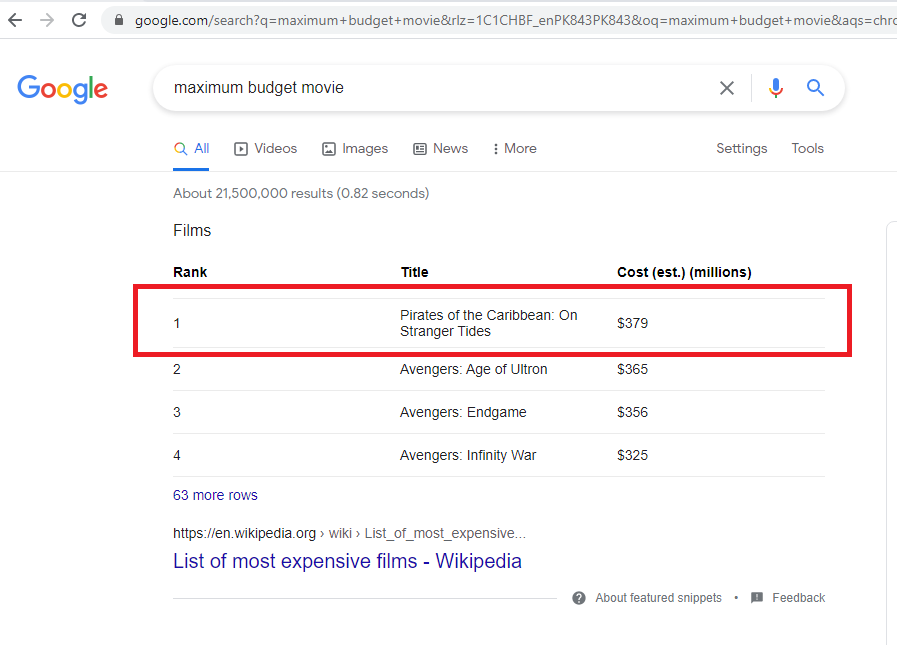

In [56]:
from IPython.display import Image
Image(filename='budgetmovie.png')

**Our predictions of data can also be verified by Google**

### Research Question 5  (What should be an appropriate budget for a movie to succeed?)

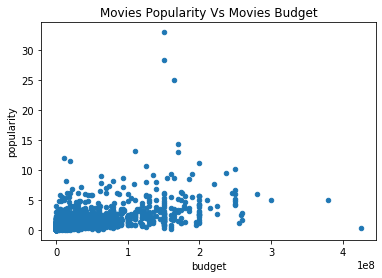

In [57]:
# Plotting a scatter plot 
df.plot(x='budget',y='popularity', kind='scatter', title='Movies Popularity Vs Movies Budget');

#### After studying the above graph, we can make some important and useful deductions. We can say, it's not necessary to have a higher budget for a movie to have a higher popularity. 

#### The maximum popularity is approximately 32

In [58]:
# To compare results with entries of popularity greater than 10
df_popularity_10 = df[df['popularity'] >= 10]

In [59]:
df_popularity_10['popularity'].describe()

count    11.000000
mean     16.572452
std       8.131291
min      10.174599
25%      11.297928
50%      12.971027
75%      19.630170
max      32.985763
Name: popularity, dtype: float64

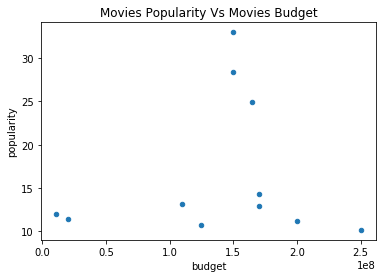

In [60]:
# Plotting a scatter plot 
df_popularity_10.plot(x='budget',y='popularity', kind='scatter', title='Movies Popularity Vs Movies Budget');

#### This scatter plot gives us a better and a clean look at the Movies Popularity and Movies Budget. In this scatter plot we can see moderate correlation and those movies whose budget is approximately between 1.5 million dollars to 2.0 million dollars have a significantly higher popularity. Hence, this can be said as a suitable budget for  movies to succeed.

In [61]:
# Summary statistics for budget of a movie
df['budget'].describe()

count    1.992000e+03
mean     3.454924e+07
std      5.061878e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+07
75%      4.800000e+07
max      4.250000e+08
Name: budget, dtype: float64

<a id='reg'></a>
## Linear Regression Model



#### To predict the total number of movies produced for each year using linear regression

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
# To anlayze the dataframe first wrt Year and number of movies
df_amount_of_movies.tail(10)

,Year,Number Of Movies
43,2006,247
44,2007,361
45,2008,360
46,2009,488
47,2010,519
48,2011,534
49,2012,375
50,2013,326
51,2014,358
52,2015,415


In [64]:
# Feature selection and training the model
X = df_amount_of_movies['Year'].values
Y = df_amount_of_movies['Number Of Movies'].values
linreg = LinearRegression()
X = X.reshape(-1,1)
linreg.fit(X, Y)

LinearRegression()

In [65]:
# Predicting results
linreg.predict([[2020]])

array([327.7967386])

**Our model accurately predicts that on year 2020, the number of movies will increase and become approximately 327**

In [66]:
linreg.coef_

array([7.40642512])

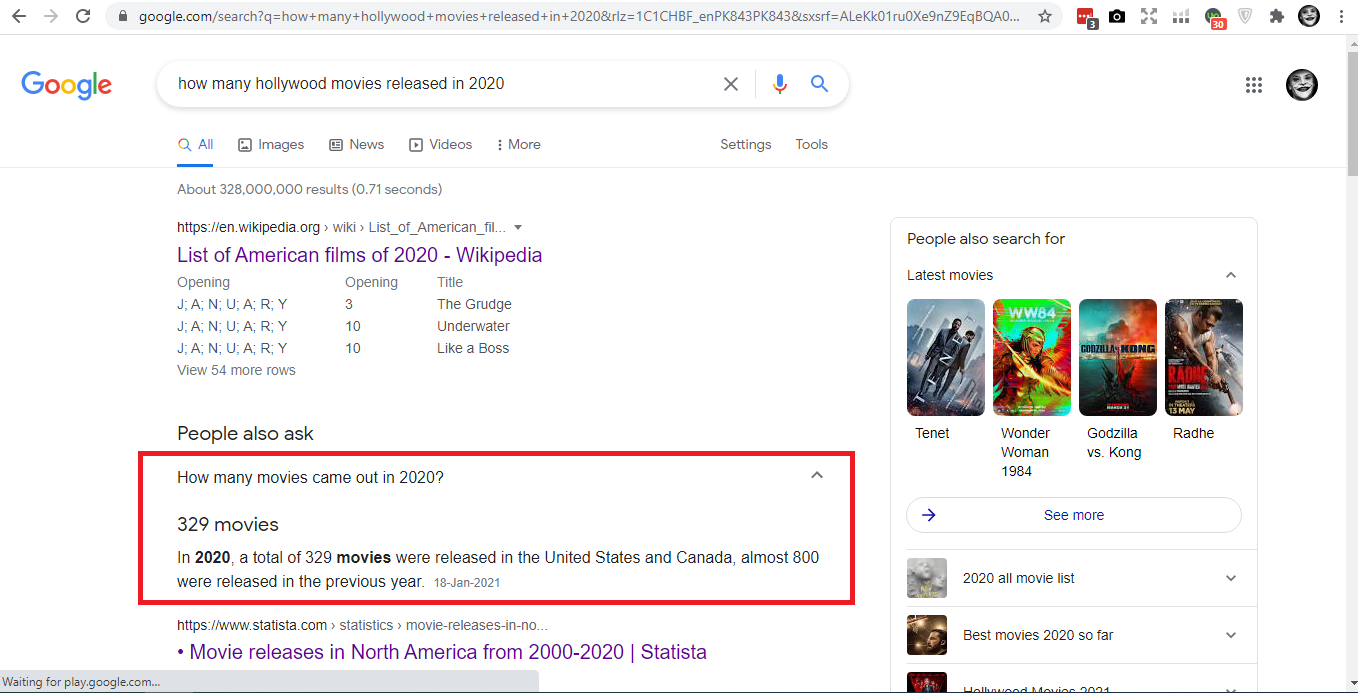

In [67]:
from IPython.display import Image
Image(filename='moviesreleased.png')

**Our model seems to be quite accurate as Google suggests 329 movies were released in 2020, while our model suggested ~328 movies. This shows our Linear Regression model is quite accurate in predicting movies released each year**

## Linear Regression Model (2)

#### Using linear regression to predict movies popularity with respect to their budget

In [68]:
# Selecting X and Y variables for our model
X = df[['budget']]
Y = df['popularity']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size=0.3)      # 30/70 splitting
X_train.shape

(1394, 1)

In [70]:
linreg = LinearRegression()
# Training the model
model = linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print('Models intercept = ',model.intercept_)
print('Models coefficient = ',model.coef_[0])

Models intercept =  0.6673975266393849
Models coefficient =  1.891851709717961e-08


In [71]:
print(model.predict([[280000000]]))

[5.96458231]


Our model predicted that for a *$280* million dollar movie budget, the popularity of that movie could be *~6*.

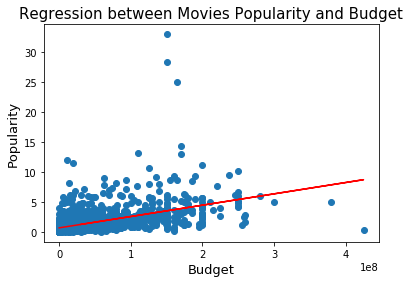

In [72]:
plt.scatter(X,Y)
plt.xlabel('Budget', fontsize= 13)
plt.ylabel('Popularity', fontsize= 13)
plt.title('Regression between Movies Popularity and Budget', fontsize=15)
plt.plot(X_test, y_pred, color='red')
plt.show()

With this regression model, we can easily predict popularity of a new movie based on the amount of budget used by the director

In [73]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print('Mean squared error = ', MSE)

Mean squared error =  2.883711875221307


In [74]:
# For root mean squared error
import math
RMSE = math.sqrt(MSE)
print('Root mean squared error = ',RMSE)

Root mean squared error =  1.6981495444221946


The lower the RMSE, the more accurate our model is.

<a id='rec'></a>
## Movie Recommendation System using Keywords

In [75]:
# Loading the original dataframe again to avoid anomalies in rows
combination = pd.read_csv('tmdb-movies.csv')
combination = combination[['original_title','keywords']]
combination.head(30)

,original_title,keywords
0,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island
1,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia
2,Insurgent,based on novel|revolution|dystopia|sequel|dyst...
3,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d
4,Furious 7,car race|speed|revenge|suspense|car
5,The Revenant,father-son relationship|rape|based on novel|mo...
6,Terminator Genisys,saving the world|artificial intelligence|cybor...
7,The Martian,based on novel|mars|nasa|isolation|botanist
8,Minions,assistant|aftercreditsstinger|duringcreditssti...
9,Inside Out,dream|cartoon|imaginary friend|animation|kid


In [76]:
movie = str(input('Enter the movie name (WARNING CASE SENSITIVE): '))

# To check whether df is empty or not
while combination[combination['original_title'] == movie]['keywords'].empty is True:
    movie = str(input('INVALID! Enter movie name again (WARNING CASE SENSITIVE): '))

Enter the movie name (WARNING CASE SENSITIVE): 
INVALID! Enter movie name again (WARNING CASE SENSITIVE): Terminator Genisys


In [77]:
# Removing '|' and replacing with ','
combination['keywords']= combination['keywords'].str.replace(r'|', ',')

# Splitting the string column into 5 different keyword column
new = combination.keywords.str.split(",", n = 5, expand = True)

# Renaming index column to index
new.index.name = 'index'

new.head()

D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,0,1,2,3,4,5
index,,,,,,
0,monster,dna,tyrannosaurus rex,velociraptor,island,None
1,future,chase,post-apocalyptic,dystopia,australia,None
2,based on novel,revolution,dystopia,sequel,dystopic future,None
3,android,spaceship,jedi,space opera,3d,None
4,car race,speed,revenge,suspense,car,None


In [78]:
# To get index of the movie

movie_index = combination.index[combination['original_title'] == movie].tolist()
movie_index = movie_index[0]  # to convert to integer
print('The movie index is: ',movie_index)

# To get row of the movie
row_movie = new.iloc[movie_index]                     
row_movie

The movie index is:  6


0           saving the world
1    artificial intelligence
2                     cyborg
3               killer robot
4                     future
5                       None
Name: 6, dtype: object

In [79]:
kw1 = row_movie[0]
kw2 = row_movie[1]
kw3 = row_movie[2]
kw4 = row_movie[3]

# Converting to string
#kw1 = kw1[0]
#kw2 = kw2[0]
#kw3 = kw3[0]
#kw4 = kw4[0]

kw1, kw2, kw3, kw4

('saving the world', 'artificial intelligence', 'cyborg', 'killer robot')

In [80]:
# Filtering movies by matching keywords
match_1 = new[(new[0] == kw1) | (new[1] == kw1) | (new[2] == kw1) | (new[3] == kw1) & ((new[0] == kw2) | (new[1] == kw2) | (new[2] == kw2) | (new[3] == kw2)) & ((new[0] == kw3) | (new[1] == kw3) | (new[2] == kw3) | (new[3] == kw3)) | (new[0] == kw4) | (new[1] == kw4) | (new[2] == kw4) | (new[3] == kw4) ]

match_1.head()

,0,1,2,3,4,5
index,,,,,,
6,saving the world,artificial intelligence,cyborg,killer robot,future,None
629,saving the world,artificial intelligence,father-son relationship,single parent,nasa,None
1392,saving the world,artificial intelligence,prophecy,san francisco,cyborg,None
1960,saving the world,date,prison,secret identity,fish,None
2160,saving the world,dc comics,superhero,based on comic book,surrealism,None


In [81]:
# merging both dataframes on primarykey = index
new_df = pd.merge(combination, match_1, how='inner', left_on=['index'], right_on=['index'])
new_df.head()

,original_title,keywords,0,1,2,3,4,5
index,,,,,,,,
6,Terminator Genisys,"saving the world,artificial intelligence,cybor...",saving the world,artificial intelligence,cyborg,killer robot,future,None
629,Interstellar,"saving the world,artificial intelligence,fathe...",saving the world,artificial intelligence,father-son relationship,single parent,nasa,None
1392,Terminator Salvation,"saving the world,artificial intelligence,proph...",saving the world,artificial intelligence,prophecy,san francisco,cyborg,None
1960,Megamind,"saving the world,date,prison,secret identity,fish",saving the world,date,prison,secret identity,fish,None
2160,Justice League: Crisis on Two Earths,"saving the world,dc comics,superhero,based on ...",saving the world,dc comics,superhero,based on comic book,surrealism,None


In [82]:
suggested_movies = []
for i in new_df['original_title']:
    if i == movie:                       # To remove the actual movie itself [another efficient approach to drop column index]
        continue
    suggested_movies.append(i)
    
print('Top 5 recommended movies are: ')
suggested_movies[:5]                                    # Displaying the top 5 list items

Top 5 recommended movies are: 


['Interstellar',
 'Terminator Salvation',
 'Megamind',
 'Justice League: Crisis on Two Earths',
 'The Matrix']

**This recommendation system covers genres of movies that best match with your movie search**

## A Simple Movie Recommender

In [83]:
from fuzzywuzzy import fuzz

def movie_recommender(movie):
    # loading the Dataset again
    df = pd.read_csv('tmdb-movies.csv')

    movies_suggestion = movie

    for i in range(len(df)):                                                            # String matching
        sim_score = fuzz.partial_ratio(movies_suggestion, df['original_title'][i])
        if sim_score >= 90:
            #suggested.append(df['original_title'][i])                                  # Appending each suggestion into list
            print(df['original_title'][i])


D:\Users\User\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [84]:
movie_recommender('Furious')

Furious 7
Fast & Furious
F
The Fast and the Furious
Kung Fu Panda: Secrets of the Furious Five
2 Fast 2 Furious
Turbo Charged Prelude to 2 Fast 2 Furious
Fast & Furious 6
The Fast and the Furious: Tokyo Drift


**This recommendation system will recommend movie names that match your search term with the movie titles**

<a id='word'></a>
# WordCloud Generation

In [85]:
movie = str(input('Enter the movie name (WARNING CASE SENSITIVE): '))

# To check whether df is empty or not
while combination[combination['original_title'] == movie]['keywords'].empty is True:
    movie = str(input('INVALID! Enter movie name again (WARNING CASE SENSITIVE): '))

print('\n\nYOU HAVE SUCCESSFULLY ENTERED MOVIE NAME! ')
print('DISPLAYING WORDCLOUD IN 3 2 1 !!!!!')

Enter the movie name (WARNING CASE SENSITIVE): Spectre


YOU HAVE SUCCESSFULLY ENTERED MOVIE NAME! 
DISPLAYING WORDCLOUD IN 3 2 1 !!!!!


In [86]:
text = combination[combination['original_title'] == movie]['keywords'].tolist()
text

['spy,based on novel,secret agent,sequel,james bond']

In [87]:
def ConvertToStr(input_seq, seperator):
    
    # Join all the strings in list
    final_str = seperator.join(input_seq)
    return final_str

seperator = '|'
text = ConvertToStr(text, seperator)

WORDCLOUD for Movie  Spectre is


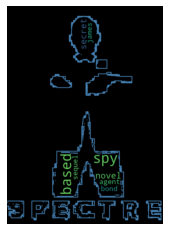

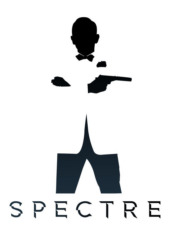

In [88]:
# Using textual keywords for wordcloud generation

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
spectre_mask = np.array(Image.open(path.join(d, "spectre_mask.jpg")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="black", max_words=2000, mask=spectre_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "spectre.png"))


print('WORDCLOUD for Movie ', movie + ' is')

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(spectre_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id='conclusions'></a>
## Conclusions



The first research question **"What were the Top 5 Genres throughout the years?"** has shown useful results, as the most popular genre turned out to be **Drama**. This data could be extremey useful for the 'Production Companies', because now they know which type of movies tend to be more popular among the masses and this could help them to drive more potential customers.

The second research question **"How did the amount of movies produced changed over time?"** gave a well defined increasing trend for movies released. The graph also shows that a peak was attained in the year 2011 for the most movies released. Also according to Wikipedia, **Film critic Scout Tafoya considers 2011 as the best year for cinema.** 

The third research question **"What is the Average Running Time Of All the Movies?"** shows an accurate result of approximately 106 minutes. This is also evident from the histogram which is plotted against Running Time and Number Of Movies.

The fourth research question **"How does the budget change throughout the years?"** shows quite useful results to the users because users can observe that throughout the years the budget has been increasing and suddenly skyrockets in the year 2011, which is considered as the best year for cinema according to Wikipedia. In 2011, **Pirates of the Caribbean: On Stranger Tides** is the maximum budget movie till this day, with a maximum budget of 380 Million Dollars USD.

The fifth research question **"What should be an appropriate budget for a movie to succeed?"** has shown surprising results. Some useful deductions which are clearly evident from the graph are not necessary for a movie to become popular and succeed even if it has a higher budget and vice versa.




### Conclusively, the limitations which one has to consider are that, there many entries which were missing (NaN) had been removed from the dataset so the accuracy of the dataset has been significantly reduced and this will greatly affect the results. Also the results obtained like Movies Popularity are only for educational purpose and many other factors are needed to be kept in mind in order to treat them as generalization. 
